In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
users=pd.read_csv('Users.csv',encoding='latin1')
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [4]:
books=pd.read_csv('Books.csv',encoding='ISO-8859-1',low_memory=False)
books.head()


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [5]:
ratings = pd.read_csv('Ratings.csv', encoding='latin1')
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [6]:
users.shape

(278858, 3)

In [7]:
books.shape

(271360, 8)

In [8]:
ratings.shape

(1149780, 3)

In [9]:
users.duplicated().sum()

0

In [10]:
books.duplicated().sum()

0

In [11]:
ratings.duplicated().sum()

0

In [12]:
def unique_values(dataset):
    list_unique_valeus = [dataset[col].nunique() for col in dataset.columns]
    list_cols = dataset.columns.tolist()
    data = list(zip(list_cols,list_unique_valeus))
    df = pd.DataFrame(data,columns = ['Column','No of Unique Values'])
    return df

In [13]:
unique_values(users)

,Column,No of Unique Values
0,User-ID,278858
1,Location,57339
2,Age,165


In [14]:
unique_values(ratings)

,Column,No of Unique Values
0,User-ID,105283
1,ISBN,340556
2,Book-Rating,11


In [15]:
unique_values(books)

,Column,No of Unique Values
0,ISBN,271360
1,Book-Title,242135
2,Book-Author,102022
3,Year-Of-Publication,118
4,Publisher,16807
5,Image-URL-S,271044
6,Image-URL-M,271044
7,Image-URL-L,271041


In [16]:
merged_df=pd.merge(users,ratings,on='User-ID')
merged_df=pd.merge(merged_df,books,on='ISBN')

In [17]:
merged_df.head()

,User-ID,Location,Age,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,2,"stockton, california, usa",18.0,0195153448,0,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,8,"timmins, ontario, canada",NaN,0002005018,5,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,11400,"ottawa, ontario, canada",49.0,0002005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
3,11676,"n/a, n/a, n/a",NaN,0002005018,8,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
4,41385,"sudbury, ontario, canada",NaN,0002005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...


In [18]:
merged_df.shape

(1031136, 12)

In [19]:
merged_df.drop(['Image-URL-S', 'Image-URL-M', 'Image-URL-L'],axis=1,inplace=True)

In [20]:
merged_df.columns= merged_df.columns.str.replace('-', '_')

In [21]:
merged_df.columns

Index(['User_ID', 'Location', 'Age', 'ISBN', 'Book_Rating', 'Book_Title',
       'Book_Author', 'Year_Of_Publication', 'Publisher'],
      dtype='object')

In [22]:
def missing_values(df):
    miss = df.isnull().sum()
    per = df.isnull().mean()
    df = pd.concat([miss,per*100],keys = ['Missing_Values','Percentage'], axis = 1)
    return df

In [23]:
missing_values(merged_df)

,Missing_Values,Percentage
User_ID,0,0.000000
Location,0,0.000000
Age,277835,26.944554
ISBN,0,0.000000
Book_Rating,0,0.000000
Book_Title,0,0.000000
Book_Author,2,0.000194
Year_Of_Publication,0,0.000000
Publisher,2,0.000194


In [24]:
merged_df.head()

,User_ID,Location,Age,ISBN,Book_Rating,Book_Title,Book_Author,Year_Of_Publication,Publisher
0,2,"stockton, california, usa",18.0,0195153448,0,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,8,"timmins, ontario, canada",NaN,0002005018,5,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,11400,"ottawa, ontario, canada",49.0,0002005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
3,11676,"n/a, n/a, n/a",NaN,0002005018,8,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
4,41385,"sudbury, ontario, canada",NaN,0002005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada


In [25]:
merged_df.loc[(merged_df.Age > 100) | (merged_df.Age < 5), 'Age'] = np.nan

In [26]:
merged_df.isna().sum()

User_ID                     0
Location                    0
Age                    282469
ISBN                        0
Book_Rating                 0
Book_Title                  0
Book_Author                 2
Year_Of_Publication         0
Publisher                   2
dtype: int64

In [29]:
# Create a country column at the place of location
merged_df['Country'] = merged_df['Location'].astype(str).apply(lambda x:x.split(',')[-1])
# Drop the location column
merged_df.drop('Location',axis=1,inplace=True) # inplace =True means we are changing original datafram itself

In [30]:
merged_df['Country'].unique()

array([' usa', ' canada', ' n/a', '', ' malaysia', ' spain',
       ' new zealand', ' finland', ' united kingdom', ' portugal',
       ' brazil', ' germany', ' austria', ' italy', ' netherlands',
       ' australia', ' france', ' costa rica', ' poland', ' us', ' iran',
       ' aruba', ' india', ' pakistan', ' taiwan', ' singapore',
       ' argentina', ' romania', ' greece', ' ireland', ' philippines',
       ' belgium', ' philippines"', ' mexico', ' south africa',
       ' burkina faso', ' croatia', ' switzerland', ' denmark', ' rwanda',
       ' yugoslavia', ' turkey', ' china', ' japan', ' qatar', ' latvia',
       ' sweden', ' kuwait', ' indonesia', ' nepal', ' peru',
       ' venezuela', ' south korea"', ' hong kong', ' united states',
       ' slovakia', ' norway', ' dominican republic',
       ' bosnia and herzegovina', ' south korea', ' macedonia', ' kenya',
       ' mauritius', ' catalonia', ' nigeria', ' madagascar', ' israel',
       ' oman', ' egypt', ' lithuania', ' guate

In [31]:
merged_df['Country'] = merged_df['Country'].replace(' ','other').replace(' n/a','other')

In [32]:
merged_df['Country'].replace(['','01776','02458','19104','23232','30064','85021','87510','alachua','america','austria','autralia','cananda','geermany','italia','united kindgonm','united sates','united staes','united state','united states','us'],
                           ['other','usa','usa','usa','usa','usa','usa','usa','usa','usa','australia','australia','canada','germany','italy','united kingdom','usa','usa','usa','usa','usa'],inplace=True)


In [33]:
def missing_values(df):
    miss = df.isnull().sum()
    per = df.isnull().mean()
    df = pd.concat([miss,per*100],keys = ['Missing_Values','Percentage'], axis = 1)
    return df

In [34]:
missing_values(merged_df)

,Missing_Values,Percentage
User_ID,0,0.000000
Age,282469,27.393962
ISBN,0,0.000000
Book_Rating,0,0.000000
Book_Title,0,0.000000
Book_Author,2,0.000194
Year_Of_Publication,0,0.000000
Publisher,2,0.000194
Country,0,0.000000


In [35]:
merged_df.head()

,User_ID,Age,ISBN,Book_Rating,Book_Title,Book_Author,Year_Of_Publication,Publisher,Country
0,2,18.0,0195153448,0,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,usa
1,8,NaN,0002005018,5,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,canada
2,11400,49.0,0002005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,canada
3,11676,NaN,0002005018,8,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,other
4,41385,NaN,0002005018,0,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,canada


In [36]:
merged_df['Year_Of_Publication'].unique()

array(['2002', '2001', '1991', '1999', '2000', '1993', '1996', '1988',
       '2004', '1998', '1994', '2003', '1997', '1987', '1989', '1992',
       '1983', '1979', '1995', '1982', '1985', '1986', '1978', '1980',
       '1952', '1990', '1981', '0', '1984', '1968', '1961', '1959',
       '1946', '1974', '1958', '1976', '1971', '1977', '1975', '1965',
       '1941', '1970', '1972', '1953', '1962', '1973', '1960', '1954',
       '1966', '1920', '1967', '1956', '1942', '1955', '1951', '1969',
       '1948', '1963', '1964', '1950', '2005', '1943', '1957', '1937',
       '1940', '1930', '1923', '1945', '1947', '1936', '1925', '1927',
       '2030', '2011', '2020', '1939', '1926', '1938', '1911', '1904',
       '1949', '1932', '1929', '1944', '1933', '1922', '1897', '2050',
       '1902', '1924', '1921', '1900', '2038', '2010', '1928', '2006',
       '1901', '2026', '2021', '1931', '1378', '1908',
       'DK Publishing Inc', 'Gallimard', '1909', '2012', '2008', '1935',
       '1376', '2037', 

In [37]:
merged_df[merged_df['Publisher'].isnull()]
# merged_df.loc[(merged_df['publisher'].isnull()),:]

,User_ID,Age,ISBN,Book_Rating,Book_Title,Book_Author,Year_Of_Publication,Publisher,Country
857163,98391,52.0,193169656X,9,Tyrant Moon,Elaine Corvidae,2002,NaN,usa
857174,98391,52.0,1931696993,9,Finders Keepers,Linnea Sinclair,2001,NaN,usa


In [38]:
missing_values(merged_df)

,Missing_Values,Percentage
User_ID,0,0.000000
Age,282469,27.393962
ISBN,0,0.000000
Book_Rating,0,0.000000
Book_Title,0,0.000000
Book_Author,2,0.000194
Year_Of_Publication,0,0.000000
Publisher,2,0.000194
Country,0,0.000000


In [39]:
merged_df.loc[(merged_df.Age > 100) | (merged_df.Age < 5), 'Age'] = np.nan

Text(0.5, 1.0, 'Find outlier data in Age column')

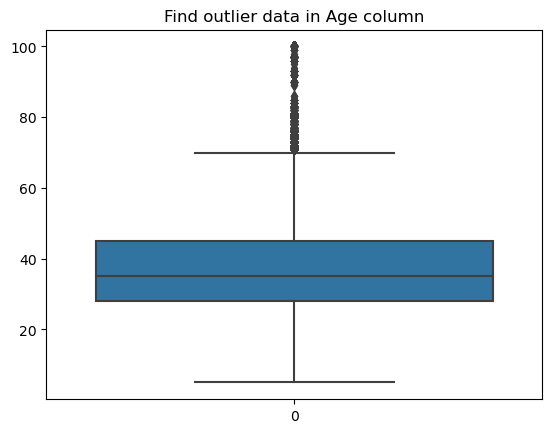

In [41]:
# finding outlier in age
# Box plot for age
sns.boxplot(merged_df['Age']);
plt.title('Find outlier data in Age column')

In [42]:
merged_df.loc[(merged_df.Age > 100) | (merged_df.Age < 5), 'Age'] = np.nan

In [43]:
merged_df.isna().sum()

User_ID                     0
Age                    282469
ISBN                        0
Book_Rating                 0
Book_Title                  0
Book_Author                 2
Year_Of_Publication         0
Publisher                   2
Country                     0
dtype: int64

In [44]:
merged_df['Age'] = merged_df['Age'].fillna(merged_df.groupby('Country')['Age'].transform('median'))

In [45]:
merged_df.isna().sum()

User_ID                  0
Age                    560
ISBN                     0
Book_Rating              0
Book_Title               0
Book_Author              2
Year_Of_Publication      0
Publisher                2
Country                  0
dtype: int64

In [46]:
merged_df['Age'].fillna(merged_df.Age.mean(),inplace=True)

In [47]:
merged_df.isna().sum()

User_ID                0
Age                    0
ISBN                   0
Book_Rating            0
Book_Title             0
Book_Author            2
Year_Of_Publication    0
Publisher              2
Country                0
dtype: int64

In [48]:
merged_df.loc[merged_df['Year_Of_Publication'] == 'DK Publishing Inc',:]

,User_ID,Age,ISBN,Book_Rating,Book_Title,Book_Author,Year_Of_Publication,Publisher,Country
906829,130571,36.0,0789466953,0,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,usa
946370,169663,36.0,078946697X,0,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,usa
946371,227771,19.0,078946697X,7,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,israel


In [49]:
merged_df.loc[merged_df['Year_Of_Publication'] == 'Gallimard',:]

,User_ID,Age,ISBN,Book_Rating,Book_Title,Book_Author,Year_Of_Publication,Publisher,Country
913994,137190,31.0,2070426769,0,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,france


In [50]:
merged_df.loc[merged_df.ISBN == '2070426769','Year_Of_Publication'] = 2003
merged_df.loc[merged_df.ISBN == '2070426769','Book_Author'] = "Jean-Marie Gustave Le ClÃ?Â©zio"
merged_df.loc[merged_df.ISBN == '2070426769','Publisher'] = "Gallimard"
merged_df.loc[merged_df.ISBN == '2070426769','Book_Title'] = "Peuple du ciel, suivi de 'Les Bergers"
merged_df.loc[merged_df.ISBN == '2070426769',:]

,User_ID,Age,ISBN,Book_Rating,Book_Title,Book_Author,Year_Of_Publication,Publisher,Country
913994,137190,31.0,2070426769,0,"Peuple du ciel, suivi de 'Les Bergers",Jean-Marie Gustave Le ClÃ?Â©zio,2003,Gallimard,france


In [51]:
merged_df.loc[merged_df.ISBN == '2070426769','Year_Of_Publication'] = 2003
merged_df.loc[merged_df.ISBN == '2070426769','Book_Author'] = "Jean-Marie Gustave Le ClÃ?Â©zio"
merged_df.loc[merged_df.ISBN == '2070426769','Publisher'] = "Gallimard"
merged_df.loc[merged_df.ISBN == '2070426769','Book_Title'] = "Peuple du ciel, suivi de 'Les Bergers"
merged_df.loc[merged_df.ISBN == '2070426769',:]

,User_ID,Age,ISBN,Book_Rating,Book_Title,Book_Author,Year_Of_Publication,Publisher,Country
913994,137190,31.0,2070426769,0,"Peuple du ciel, suivi de 'Les Bergers",Jean-Marie Gustave Le ClÃ?Â©zio,2003,Gallimard,france


In [52]:
merged_df['Year_Of_Publication']=pd.to_numeric(merged_df['Year_Of_Publication'], errors='coerce')
merged_df['Year_Of_Publication'].unique()

array([2002., 2001., 1991., 1999., 2000., 1993., 1996., 1988., 2004.,
       1998., 1994., 2003., 1997., 1987., 1989., 1992., 1983., 1979.,
       1995., 1982., 1985., 1986., 1978., 1980., 1952., 1990., 1981.,
          0., 1984., 1968., 1961., 1959., 1946., 1974., 1958., 1976.,
       1971., 1977., 1975., 1965., 1941., 1970., 1972., 1953., 1962.,
       1973., 1960., 1954., 1966., 1920., 1967., 1956., 1942., 1955.,
       1951., 1969., 1948., 1963., 1964., 1950., 2005., 1943., 1957.,
       1937., 1940., 1930., 1923., 1945., 1947., 1936., 1925., 1927.,
       2030., 2011., 2020., 1939., 1926., 1938., 1911., 1904., 1949.,
       1932., 1929., 1944., 1933., 1922., 1897., 2050., 1902., 1924.,
       1921., 1900., 2038., 2010., 1928., 2006., 1901., 2026., 2021.,
       1931., 1378., 1908.,   nan, 1909., 2012., 2008., 1935., 1376.,
       2037., 1906., 1806., 1917., 1919., 1914., 1934., 1910., 2024.])

In [53]:
merged_df.loc[(merged_df['Year_Of_Publication'] > 2006) | (merged_df['Year_Of_Publication'] == 0),'Year_Of_Publication'] = np.NAN
merged_df['Year_Of_Publication'].fillna(round(merged_df['Year_Of_Publication'].median()), inplace=True)

In [54]:
merged_df.isna().sum()

User_ID                0
Age                    0
ISBN                   0
Book_Rating            0
Book_Title             0
Book_Author            2
Year_Of_Publication    0
Publisher              2
Country                0
dtype: int64

In [55]:
merged_df.loc[merged_df.Publisher.isnull(),:]


,User_ID,Age,ISBN,Book_Rating,Book_Title,Book_Author,Year_Of_Publication,Publisher,Country
857163,98391,52.0,193169656X,9,Tyrant Moon,Elaine Corvidae,2002.0,NaN,usa
857174,98391,52.0,1931696993,9,Finders Keepers,Linnea Sinclair,2001.0,NaN,usa


In [56]:
merged_df.Publisher.fillna('other',inplace=True)

In [57]:
merged_df.loc[merged_df['Book_Author'].isnull(),:]

,User_ID,Age,ISBN,Book_Rating,Book_Title,Book_Author,Year_Of_Publication,Publisher,Country
778170,63714,29.0,0751352497,10,A+ Quiz Masters:01 Earth,NaN,1999.0,Dorling Kindersley,united kingdom
857604,98647,26.0,9627982032,8,The Credit Suisse Guide to Managing Your Perso...,NaN,1995.0,Edinburgh Financial Publishing,malaysia


In [58]:
merged_df['Book_Author'].fillna('other',inplace=True)

In [59]:
merged_df.isna().sum()

User_ID                0
Age                    0
ISBN                   0
Book_Rating            0
Book_Title             0
Book_Author            0
Year_Of_Publication    0
Publisher              0
Country                0
dtype: int64

In [60]:
missing_values(merged_df)

,Missing_Values,Percentage
User_ID,0,0.0
Age,0,0.0
ISBN,0,0.0
Book_Rating,0,0.0
Book_Title,0,0.0
Book_Author,0,0.0
Year_Of_Publication,0,0.0
Publisher,0,0.0
Country,0,0.0


In [61]:
merged_df.shape

(1031136, 9)

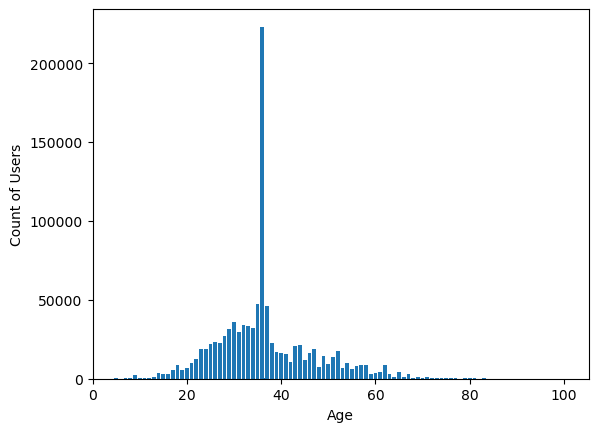

In [62]:
u = merged_df.Age.value_counts().sort_index()
plt.bar(u.index, u.values)
plt.xlabel('Age')
plt.ylabel('Count of Users')
plt.xlim(xmin = 0)
plt.show()

Text(0.5, 1.0, 'Top 10 Publishers')

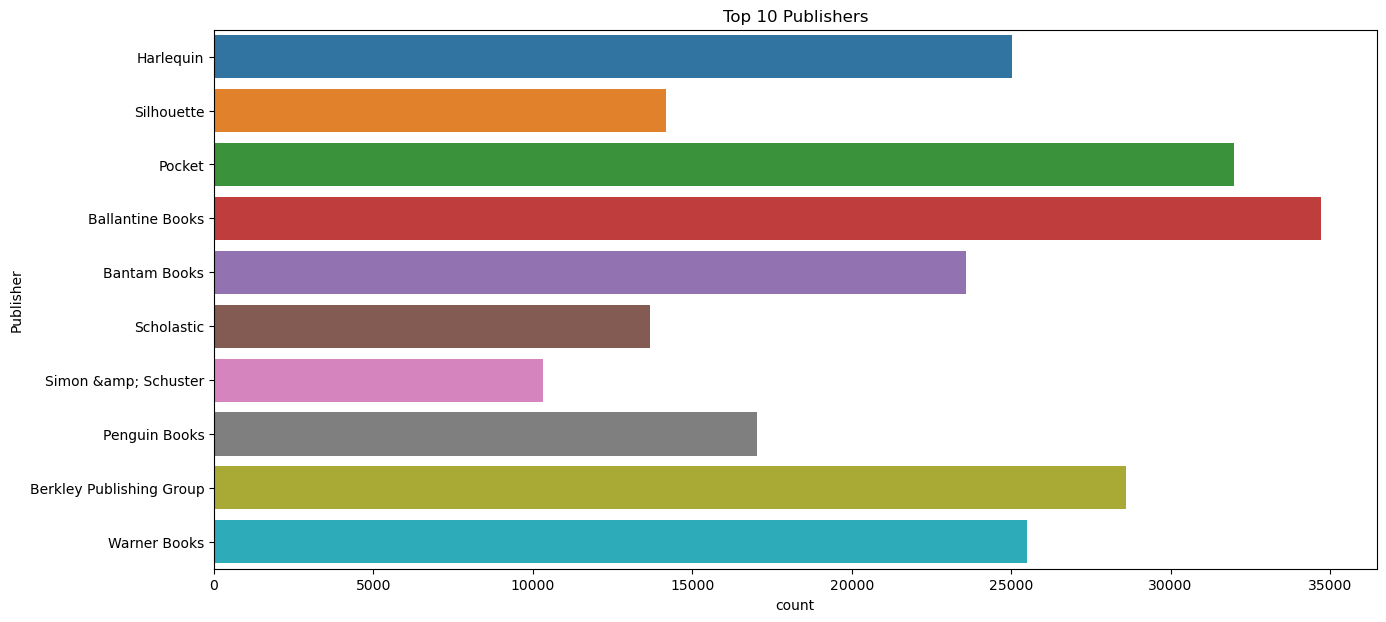

In [63]:
plt.figure(figsize=(15,7))
sns.countplot(y='Publisher',data=merged_df,order=pd.value_counts(books['Publisher']).iloc[:10].index)
plt.title('Top 10 Publishers')

Text(0.5, 1.0, 'Top 10 Authors')

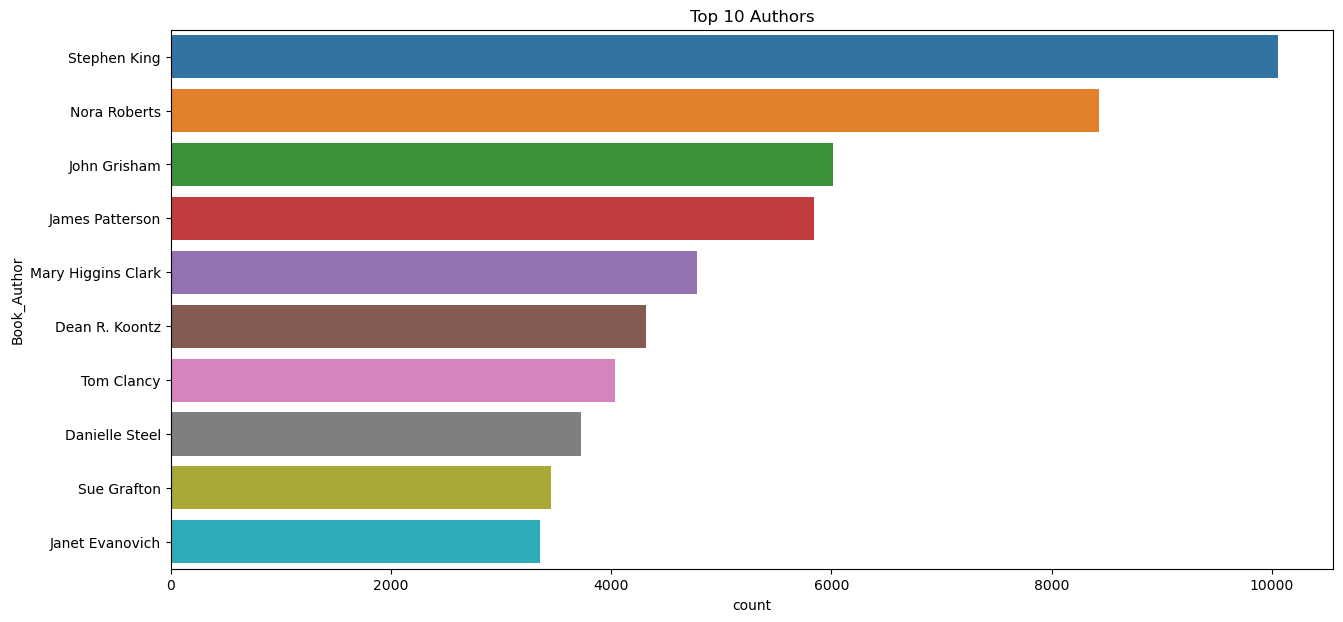

In [64]:
plt.figure(figsize=(15,7))
sns.countplot(y='Book_Author',data=merged_df,order=pd.value_counts(merged_df['Book_Author']).iloc[:10].index)
plt.title('Top 10 Authors')

C:\Users\study\AppData\Local\Temp\ipykernel_4044\3899603912.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(merged_df.Age)


Text(0.5, 1.0, 'Age Distribution Plot')

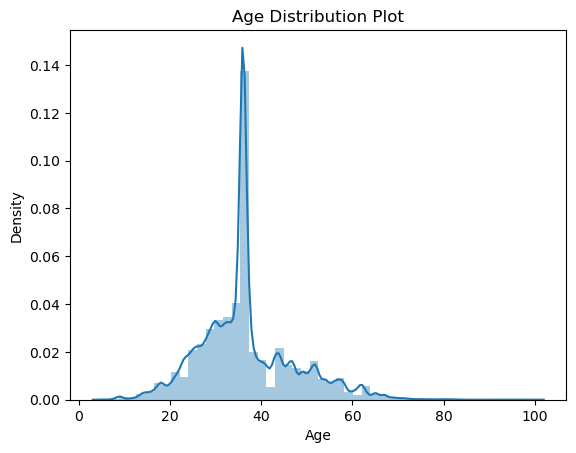

In [65]:
sns.distplot(merged_df.Age)
plt.title('Age Distribution Plot')

Text(0.5, 1.0, 'Count of users Country wise')

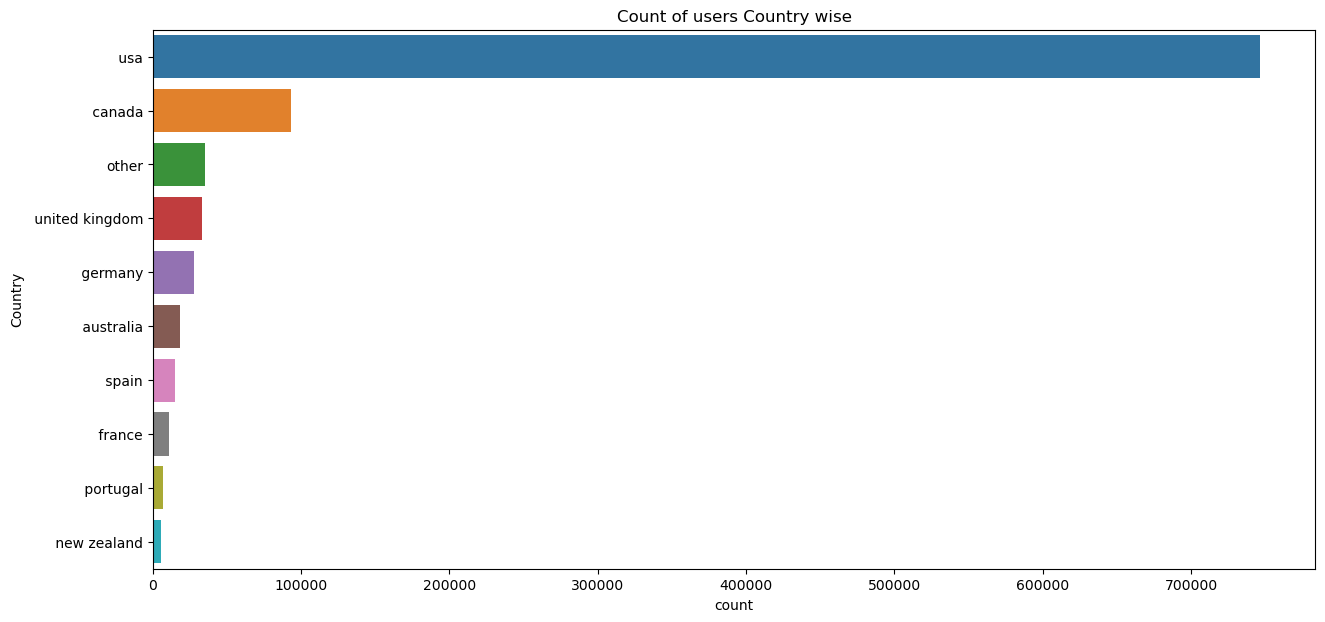

In [66]:
plt.figure(figsize=(15,7))
sns.countplot(y='Country',data=merged_df,order=pd.value_counts(merged_df['Country']).iloc[:10].index)
plt.title('Count of users Country wise')


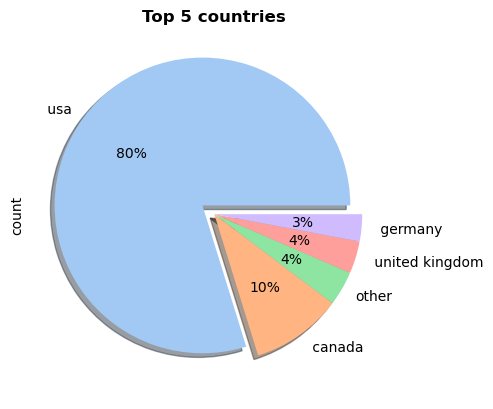

In [67]:
# Pie Graph of top five countires.
palette_color = sns.color_palette('pastel')
explode = (0.1, 0, 0, 0, 0)
merged_df.Country.value_counts().iloc[:5].plot(kind='pie', colors=palette_color, autopct='%.0f%%', explode=explode, shadow=True)
plt.title('Top 5 countries', fontweight='bold');

C:\Users\study\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
C:\Users\study\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


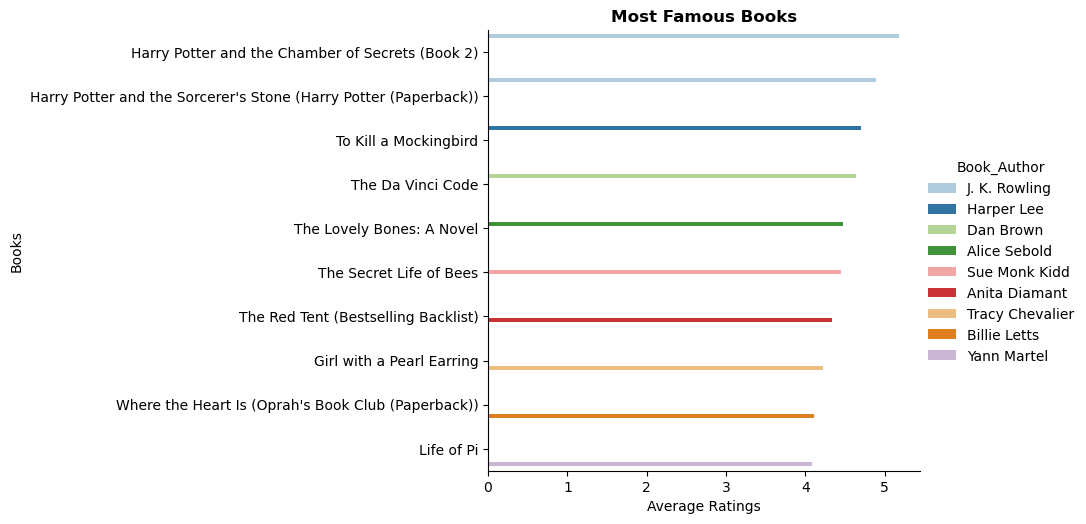

In [68]:
book_rating = merged_df.groupby(['Book_Title','Book_Author'])['Book_Rating'].agg(['count','mean']).sort_values(by='mean', ascending=False).reset_index()
sns.catplot(x='mean', y='Book_Title', data=book_rating[book_rating['count']>500][:10], kind='bar', palette = 'Paired',hue='Book_Author' )
plt.xlabel('Average Ratings')
plt.ylabel('Books')
plt.title('Most Famous Books', fontweight='bold');

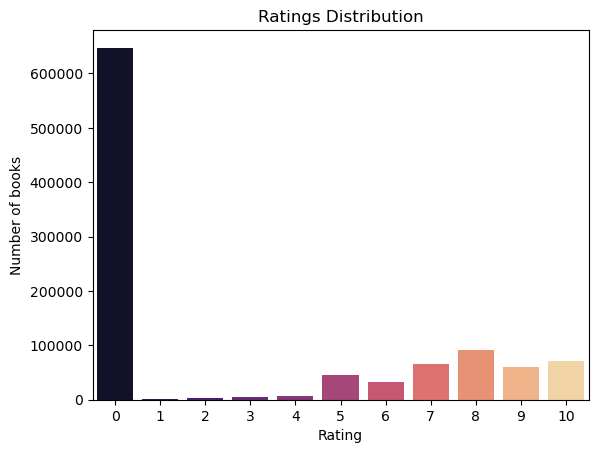

In [69]:
sns.barplot(x = merged_df['Book_Rating'].value_counts().index,y = merged_df['Book_Rating'].value_counts().values,palette = 'magma').set(title="Ratings Distribution", xlabel = "Rating",ylabel = 'Number of books')
plt.show();

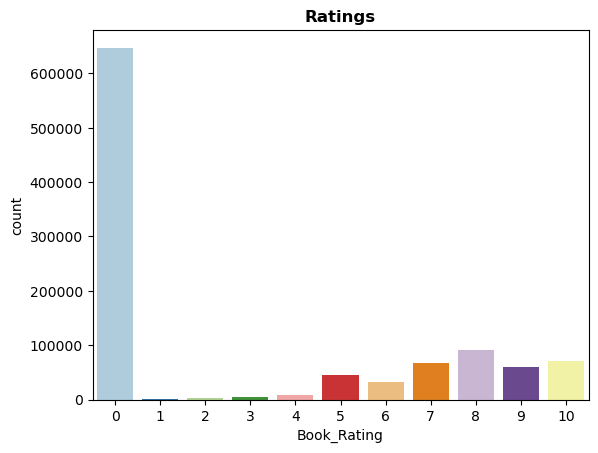

In [70]:
sns.countplot(x="Book_Rating",palette='Paired',data=merged_df)
plt.title("Ratings",fontweight='bold');

In [80]:
merged_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1031136 entries, 0 to 1031135
Data columns (total 11 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   User_ID              1031136 non-null  int64  
 1   Age                  1031136 non-null  float64
 2   ISBN                 1031136 non-null  object 
 3   Book_Rating          1031136 non-null  int64  
 4   Book_Title           1031136 non-null  object 
 5   Book_Author          1031136 non-null  object 
 6   Year_Of_Publication  1031136 non-null  float64
 7   Publisher            1031136 non-null  object 
 8   Country              1031136 non-null  object 
 9   Avg_Ratings          1031136 non-null  float64
 10  No_Of_Ratings        1031136 non-null  int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 86.5+ MB


In [84]:
merged_df = merged_df.dropna(subset=['Book_Rating'])


In [85]:
merged_df.corr()



ValueError: could not convert string to float: '074322678X'

In [72]:
merged_df['Avg_Ratings'] =  merged_df.groupby('Book_Title')['Book_Rating'].transform('mean')

In [73]:
merged_df['No_Of_Ratings'] = merged_df.groupby('Book_Title')['Book_Rating'].transform('count')

In [74]:
popular_df = merged_df[['Book_Title','Avg_Ratings','No_Of_Ratings']]

In [75]:
popular_df.drop_duplicates('Book_Title',inplace=True)

C:\Users\study\AppData\Local\Temp\ipykernel_4044\3707401356.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popular_df.drop_duplicates('Book_Title',inplace=True)


In [76]:
popular_df.head()

,Book_Title,Avg_Ratings,No_Of_Ratings
0,Classical Mythology,3.500000,2
1,Clara Callan,4.928571,14
15,Decision in Normandy,5.000000,3
18,Flu: The Story of the Great Influenza Pandemic...,4.272727,11
29,The Mummies of Urumchi,0.000000,1


In [77]:
popular_df = popular_df[popular_df['No_Of_Ratings']>200].sort_values('Avg_Ratings',ascending=False)

In [78]:
popular_df.head(10)

,Book_Title,Avg_Ratings,No_Of_Ratings
32601,Harry Potter and the Prisoner of Azkaban (Book 3),5.852804,428
33024,Harry Potter and the Goblet of Fire (Book 4),5.824289,387
37538,Harry Potter and the Sorcerer's Stone (Book 1),5.737410,278
33218,Harry Potter and the Order of the Phoenix (Boo...,5.501441,347
72126,Ender's Game (Ender Wiggins Saga (Paperback)),5.409639,249
32080,Harry Potter and the Chamber of Secrets (Book 2),5.183453,556
167539,The Hobbit : The Enchanting Prelude to The Lor...,5.007117,281
37807,The Fellowship of the Ring (The Lord of the Ri...,4.948370,368
125266,Harry Potter and the Sorcerer's Stone (Harry P...,4.895652,575
37870,"The Two Towers (The Lord of the Rings, Part 2)",4.880769,260


In [79]:
merged_df.shape

(1031136, 11)

In [86]:
merged_df.columns

Index(['User_ID', 'Age', 'ISBN', 'Book_Rating', 'Book_Title', 'Book_Author',
       'Year_Of_Publication', 'Publisher', 'Country', 'Avg_Ratings',
       'No_Of_Ratings'],
      dtype='object')

In [87]:
x = merged_df.groupby('User_ID').count()['Book_Rating'] > 180

In [88]:
x[x]

User_ID
254       True
2033      True
2276      True
2766      True
2977      True
          ... 
277427    True
277478    True
277639    True
278188    True
278418    True
Name: Book_Rating, Length: 918, dtype: bool

In [89]:
merged_df['User_ID'].isin(x[x].index)

0          False
1          False
2          False
3           True
4          False
           ...  
1031131    False
1031132    False
1031133    False
1031134    False
1031135    False
Name: User_ID, Length: 1031136, dtype: bool

In [90]:
print("Shape of merged dataframe : ",merged_df.shape)

Shape of merged dataframe :  (1031136, 11)


In [91]:
merged_df = merged_df[merged_df['Book_Rating']!=0]

In [92]:
print("Shape of merged new dataframe : ",merged_df.shape)

Shape of merged new dataframe :  (383842, 11)


In [93]:
x = merged_df.groupby('User_ID').count()['Book_Rating'] >180
filtered_df = merged_df[merged_df['User_ID'].isin(x[x].index)]

In [94]:
y = merged_df.groupby('Book_Title').count()['Book_Rating'] >50
filtered_df = filtered_df[filtered_df['Book_Title'].isin(y[y].index)]

In [95]:
filtered_df.shape

(5432, 11)

In [96]:
filtered_df.head()

,User_ID,Age,ISBN,Book_Rating,Book_Title,Book_Author,Year_Of_Publication,Publisher,Country,Avg_Ratings,No_Of_Ratings
31,11676,37.0,0399135782,9,The Kitchen God's Wife,Amy Tan,1991.0,Putnam Pub Group,other,2.996785,311
34,46398,37.0,0399135782,9,The Kitchen God's Wife,Amy Tan,1991.0,Putnam Pub Group,usa,2.996785,311
54,230522,52.0,0399135782,7,The Kitchen God's Wife,Amy Tan,1991.0,Putnam Pub Group,usa,2.996785,311
58,245827,37.0,0399135782,9,The Kitchen God's Wife,Amy Tan,1991.0,Putnam Pub Group,other,2.996785,311
106,7346,49.0,0440234743,9,The Testament,John Grisham,1999.0,Dell,usa,3.179903,617


In [97]:
pt = filtered_df.pivot_table(index='Book_Title',columns='User_ID',values='Book_Rating').fillna(0)
pt

User_ID,2276,4385,6251,6575,7346,11676,12982,13552,16634,16795,...,258534,261829,262998,264321,265115,265889,268932,269566,270713,274061
Book_Title,,,,,,,,,,,,,,,,,,,,,
1984,0.0,0.0,0.0,0.0,8.0,10.000000,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,9.000000,0.0,0.0,0.0,9.0,...,6.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,10.0,0.0,0.0,0.0,0.0,7.500000,0.0,0.0,0.0,0.0,...,0.0,7.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0
84 Charing Cross Road,0.0,0.0,0.0,0.0,0.0,8.333333,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Wizard and Glass (The Dark Tower, Book 4)",0.0,0.0,0.0,0.0,0.0,10.000000,0.0,0.0,9.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Wuthering Heights,0.0,0.0,0.0,0.0,0.0,10.000000,0.0,0.0,8.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Year of Wonders,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [98]:
df = pd.DataFrame(filtered_df)

In [99]:
df.to_csv('output_file.csv', index=False)